# **Dados:**

 **Aluno(a):** `Adicione seu nome aqui`

 **Matrícula:** `Adicione sua matrícula aqui`

## Objetivo do Laboratório

Neste laboratório, você irá **analisar a lei de Zipf e a construção de modelos de linguagem N-grams** em um texto. O objetivo é verificar se a lei se mantém em diversas etapas do pré-processamento. Além disso, você irá gerar seu próprio modelo de linguagem n-grama.

### Bibliotecas que você pode utilizar:

- [NLTK (Natural Language Toolkit)](https://www.nltk.org/): Uma das bibliotecas mais tradicionais, com ferramentas para tokenização, stemming, stopwords, N-grams, entre outras.
- [spaCy](https://spacy.io/): Biblioteca moderna e eficiente para tarefas de PLN, como lematização, dependência sintática e análise gramatical.
- [Scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction): Possui recursos para extração de características a partir de texto (como vetorização e contagem de N-grams).

**Dica:** Comece com o **NLTK**, pois ela tem suporte direto e simples para geração de **N-grams**.


## **Bibliotecas**

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import re

# Import StopWords
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

# Importação de Modelos Bi-Grams e Tri-Grams
from nltk import bigrams, trigrams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Obtenção dos Dados**

Para a atividade desse laborátorio, iremos utilizar dados textuais oriundos do **[Project Gutenberg](https://www.gutenberg.org/)**. O texto escolhido é a obra Dom Casmurro.

In [ ]:
#Endereço do texto e seu download
r = requests.get("https://www.gutenberg.org/cache/epub/55752/pg55752-images.html")

r.encoding = 'utf-8'

html = r.text

print(html[0:2000])

In [ ]:
# Exibir o livro
soup = BeautifulSoup(html, 'html.parser')

texto = soup.get_text()

print(texto[32000:34000])

In [ ]:
#Remove informações do início e fim do capítulo. Elas não são importantes
def limpar_texto_gutenberg(texto):
    inicio_frase = "Do titulo."
    inicio = texto.find(inicio_frase)
    fim = texto.find("*** END OF THE PROJECT")
    if inicio != -1 and fim != -1:
        return texto[inicio + len(inicio_frase):fim]
    return texto

texto_original = limpar_texto_gutenberg(texto)
print(texto_original[:700])

# Lei de Zipf

Vamos analisar se o texto obedece a lei de Zipf. Devemos investigar se ocorre o fenômeno da cauda longa, ou seja, poucas palavras com alta frequência, e muitas palavras com baixa frequência. Faça o que se pede a seguir:

1. Observe se o texto original segue a lei de zipf. Para isso, tokenize o texto considerando somente palavras alfanuméricas. Depois calcule sua frequência e exiba um gráfico da contagem por palavra.

In [ ]:
#1. Você pode realizar a tokenização utilizando a biblioteca re.find(), re.split() ou a nltk.tokenize.RegexpTokenizer() passando sua expressão e chamando o método tokenize
# Tokenize e armazene o resultado em uma variável chamada tokens

print(tokens[0:8])

['Uma', 'noite', 'destas', 'vindo', 'da', 'cidade', 'para', 'o']


In [ ]:
#Você pode contar a frequência de cada palavra utilizando a biblioteca nltk.FreqDist(lista de palavras)
#Você pode plotar o gráfico com o método plot() do objeto nltk.FreqDist() exemplo a seguir
%matplotlib inline


#Seu código de contagem aqui, armazenando na variável contagem
contagem.plot(50)

2. Agora normalize o texto colocando todas as palavras da lista de tokens da etapa anterior em caixa baixa e verifique como se comporta a nova distribuição no gráfico.

In [ ]:
#Você colocar cada palavra em caixa baixa percorrendo os tokens originais e utilizando a função lower() da própria classe String.
#Cada novo token que foi colocado em caixa baixa pode ser adicionado a uma lista auxiliar tokens_lw


print(tokens_lw[0:5])

['uma', 'noite', 'destas', 'vindo', 'da']


In [ ]:
#Refaça a contagem e plote o novo gráfico utilizando a mesma biblioteca da etapa anterior
%matplotlib inline


#Seu código de contagem aqui, armazenando na variável contagem_lower
contagem_lower.plot(50)

3. Remova as stopwords da lista de tokens da etapa anterior e refaça o processo para verificar se a lei de Zipf se mantém. Para isso, utilize stopwords da mesma língua do texto.

In [ ]:
#Você pode remover as stopwords recuperando-as da lista da biblioteca stopwords.words('portuguese')
#A verificação pode ser feita, percorrendo sua lista de tokens atual e verificando se aquele token não é uma stopword
#Os tokens que não são stopwords devem ser adicionados a uma lista tokens_lw_sw


print(tokens_lw_sw[0:8])

['noite', 'destas', 'vindo', 'cidade', 'engenho', 'novo', 'encontrei', 'trem']


In [ ]:
#Refaça a contagem com nltk.FreqDist e plote o gráfico
%matplotlib inline


#Seu código de contagem aqui
contagem_lw_ns.plot(50)

4. Agora aplique a etapa de stemming na lista de tokens da etapa e refaça o processo para verificar se a lei de Zipf se mantém. Para isso utilize alguma biblioteca de stemming.

In [ ]:
#Você pode aplicar a etapa de stemming utilizando a função stem(token) da classe PorterStemmer() em cada token da lista
#Cada token que passou pelo processo de stemming deve ser adicionado à lista tokens_lw_sw_st


print(tokens_lw_sw_st[0:5])

['noit', 'desta', 'vindo', 'cidad', 'engenho']


In [ ]:
#Refaça a contagem e plote o novo gráfico utilizando a mesma biblioteca anterior
%matplotlib inline


#Seu código de contagem aqui
contagem_lw_sw_st.plot(50)

5. Ao invés de considerar apenas a ocorrências das palavras unitárias (unigramas), agora utilize bigramas e trigramas. Plote o gráfico e verifique se a lei se mantém para essas novas estruturas. Faça isso com o texto original.

In [ ]:
#Faça a contagem para o texto original que foi apenas tokenizado sem nenhum pré-processamento.
#Para contar os bigramas e trigramas você pode utilizar as funções bigrams e trigrams do nltk, o resultado deve ser transformado em lista



print(bigram_tokens[0:5])
print(trigram_tokens[0:5])

[('Uma', 'noite'), ('noite', 'destas'), ('destas', 'vindo'), ('vindo', 'da'), ('da', 'cidade')]
[('Uma', 'noite', 'destas'), ('noite', 'destas', 'vindo'), ('destas', 'vindo', 'da'), ('vindo', 'da', 'cidade'), ('da', 'cidade', 'para')]


In [ ]:
#Faça a contagem dos bigramas e trigramas e plote cada um em um gráfico, você pode aplicar a nltk.FreqDist(bigramas ou trigramas)
%matplotlib inline


#Seu código de contagem aqui
contagem_bigram_tokens.plot(50)

In [ ]:
%matplotlib inline


#Seu código de contagem aqui
contagem_trigram_tokens.plot(50)

## Perguntas (Lei de Zipf)

**1. Considerando o texto sem nenhum tipo de pré-processamento (apenas tokenização), o livro segue a Lei de Zipf? Também considerando bigramas e trigramas? Justifique.**
- Resposta: ``

**1. Considerando as etapas do pré-processamento, a lei de Zipf se mantém entre elas? Justifique.**
- Resposta: ``

**2. Em alguma das etapas do pré-processmaneto, as palavras mais frequentes são relacionadas com o enredo do livro?**
- Resposta: ``

## **Modelos de Linguagem N-Gramas**
Vamos gerar modelos de linguagem utilizando n-gramas e verificar se é possível predizer textos que se assemelham ao texto original. Nessa etapa, não precisaremos utilizar todas as tarefas do pré-processamento, pois pretendemos que nosso modelo seja o mais fiel possível aos dados originais. Siga os passos abaixo:

## **Modelos Bi-Gram**

1. Antes de tokenizarmos, é necessário fazermos alguns ajustes no texto original, para que nosso modelo possa capturar a distribuição real das sequências. Para isso, em cada sentença, devemos incluir o marcardor `<s>` no início e `</s>` no fim.

In [ ]:
#Você pode adicionar os marcadores de início e fim do texto utilizando regex.
#Inicialmente vamos substituir a sequência ... pelo caractere vazio, pois há várias ocorrências de ...
#Dica: use a função re.sub()
texto_mk = '<s> ' + texto_original


print(texto_mk[:200])

<s> 
Uma noite destas, vindo da cidade para o
Engenho Novo, encontrei no trem da Central um
rapaz aqui do bairro, que eu conheço de vista e de
chapéo. Comprimentou-me, sentou-se ao pé de
mim, falo


In [ ]:
#Sempre que aparece um ponto final, na maioria das vezes isso significa o fim de uma sentença e o início de uma nova sentença.
#podemos trocar todos os pontos que são de borda (seguidos ou não por espaço) por </s> <s> .
#Dica: use a função re.sub()


print(texto_mk[:200])

<s> 
Uma noite destas, vindo da cidade para o
Engenho Novo, encontrei no trem da Central um
rapaz aqui do bairro, que eu conheço de vista e de
chapéo </s> <s> Comprimentou-me, sentou-se ao pé de
m


2. Agora devemos tokenizar considerando somente palavras que contém letras mantendo os marcadores de início e fim para mantermos a distribuição original das palavras nas sentenças do nosso texto.

In [ ]:
# A Tokenização pode ser feita com a biblioteca re. ou nltk.tokenize.RegexpTokenizer() chamando o método tokenize(lista de tokens).
# Essa parte está completa! Esse é um exemplo de função que você pode usar para fazer a tokenização:
tokenizer = nltk.tokenize.RegexpTokenizer('[^\s,\d]+')
tokens_mk = tokenizer.tokenize(texto_mk)


print(tokens_mk[0:40])

['<s>', 'Uma', 'noite', 'destas', 'vindo', 'da', 'cidade', 'para', 'o', 'Engenho', 'Novo', 'encontrei', 'no', 'trem', 'da', 'Central', 'um', 'rapaz', 'aqui', 'do', 'bairro', 'que', 'eu', 'conheço', 'de', 'vista', 'e', 'de', 'chapéo', '</s>', '<s>', 'Comprimentou-me', 'sentou-se', 'ao', 'pé', 'de', 'mim', 'falou', 'da', 'lua']


In [ ]:
# Transforme cada token da etapa original para caixa baixa. Isso possibilita ao modelo uma maior generalização.
# Para isso, você pode percorrer sua lista de tokens e aplicar a função lower() em cada token, salvando o token na lista tokens_mk_lw



print(tokens_mk_lw[0:10])

['<s>', 'uma', 'noite', 'destas', 'vindo', 'da', 'cidade', 'para', 'o', 'engenho']


3. Vamos gerar os bigramas utilizando a lista de tokens da etapa anterior assim como sua contagem.

In [ ]:
#Você pode utilizar a função bigrams na sua lista de tokens e salvar o resultado na variável bigrams_mk



print(bigrams_mk[:10])

[('<s>', 'uma'), ('uma', 'noite'), ('noite', 'destas'), ('destas', 'vindo'), ('vindo', 'da'), ('da', 'cidade'), ('cidade', 'para'), ('para', 'o'), ('o', 'engenho'), ('engenho', 'novo')]


4. Vamos remover o bigrama (`<\s>`, `<s>`), pois eles não fazem parte da distribuição real nas sentenças.

In [ ]:
#Essa remoção evita que o bigrama (<\s>, <s>) influencie nas contagens
#Essa parte está completa!
bigrams_mk_filtrado = [bg for bg in bigrams_mk if bg != ('</s>', '<s>')]
print(bigrams_mk_filtrado[:10])

[('<s>', 'uma'), ('uma', 'noite'), ('noite', 'destas'), ('destas', 'vindo'), ('vindo', 'da'), ('da', 'cidade'), ('cidade', 'para'), ('para', 'o'), ('o', 'engenho'), ('engenho', 'novo')]


### **Probabilidade Condicional - Bi-Gram**
Nessa etapa, vamos calcular a probabilidade condicional de cada bigrama. Lembrando que isso pode ser feito pelo estimador de máxima verossimilhança:


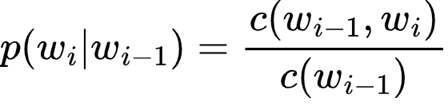

1. Pela fórmula , devemos contar a frequência dos bigramas (Numerador) assim como a frequência de de cada palavra anterior (Denominador).

In [ ]:
#Para contar unigramas você pode utilizar a nltk.FreqDist() passando a lista de tokens


print(freq_unigram.most_common(5))
print(freq_bigram.most_common(5))

[('<s>', 3606), ('</s>', 3605), ('que', 2627), ('a', 2468), ('e', 2167)]
[(('que', 'não'), 188), (('que', 'me'), 176), (('o', 'que'), 173), (('<s>', 'a'), 169), (('<s>', 'não'), 168)]


2. Calcule cada probabilidade condicional. Para cada bigrama, divida sua contagem pela contagem da primeira palavra do bigrama.

In [ ]:
#A estrutura abaixo já percorre cada bigrama sendo possível acessar suas palavras w1 e w2.
#Você pode usar essas palavras para acessar a frequência do bigrama, usando-as como chave para recuperar sua contagem
#O mesmo pode ser feito com os unigramas

cond_prob = {}
for (w1, w2) in bigrams_mk:


    #calcule a probabilidade condicional aqui e armazene em prob
    cond_prob[(w1, w2)] = prob

for (w1, w2), p in list(cond_prob.items())[:5]:
    print(f"P({w2} | {w1}) = {p:.4f}")

P(uma | <s>) = 0.0072
P(noite | uma) = 0.0093
P(destas | noite) = 0.0250
P(vindo | destas) = 0.2500
P(da | vindo) = 0.1111


In [ ]:
# Para verificar uma probabilidade, utilize as duas palavras como uma chave única no dicionário
print(bigrams_mk[:5])
cond_prob[('vindo', 'da')]

[('<s>', 'uma'), ('uma', 'noite'), ('noite', 'destas'), ('destas', 'vindo'), ('vindo', 'da')]


0.1111111111111111

3. Utilize a função abaixo para gerar algumas sentenças com seu modelo bigrama. A função já está pronta, nada deve ser feito, apenas invocá-la passando seu dicionário (variável cond_prob) de probabilidades condicionais.

In [ ]:
import random

def gerar_sentenca_shannon_bigram(cond_prob):
    sentenca = []
    w1 = '<s>'

    while True:
        # Obter todas as palavras w2 possíveis dado w1
        candidatos = [(w2, prob) for (prev, w2), prob in cond_prob.items() if prev == w1]

        if not candidatos:
            break  # não há continuidade possível

        # Separar palavras e probabilidades
        palavras, probs = zip(*candidatos)

        # Amostrar uma palavra com base nas probabilidades
        w2 = random.choices(palavras, weights=probs, k=1)[0]

        if w2 == '</s>':
            break

        sentenca.append(w2)
        w1 = w2

    return ' '.join(sentenca)

In [ ]:
#Gere e exiba a primeira sentença
print(sent)

In [ ]:
#Gere e exiba a segunda sentença
print(sent)

In [ ]:
#Gere e exiba a terceira sentença
print(sent)

4. Calcule a Perplexidade de uma das sentenças geradas.

In [ ]:
#Utilize uma das sentenças geradas e aplique o método split() para quebrá-la por espaços
#Gere os bigramas para a lista de tokens obtidas com o split()
#Percorra cada bigrama, recupere a probabilidade desse bigrama que está no dicionário cond_prob
#Multiplique todas as probabilidades e armazene o resultado na variável sentence_probabilities



#Veja a perplexidade resultante
sentence_perplexity = 1 / (sentence_probabilities ** (1 / len(sentence_tokens)))
print(f"Perplexidade da sentença: {sentence_perplexity:.4f}")

Perplexidade da sentença: 17.7320


## **Perguntas**

**1. As sentenças geradas com o algoritmo de shannon, fizeram sentido ou apresentam partes com sentido? Justifique**

`Sua Resposta`


# Para CASA
Tente adaptar o modelo bigrama para trigrama e compare os resultados. Essa etapa não deve ser enviada como resultado do lab. Dica: agora o início e final de cada sentença deve agora considerar dois `<s>` e `</s>`